# Projet 5

**Sommaire:**
- <a href="#C1">Importation des données</a>

**Partie 1 : Nettoyage des données**
 - <a href="#C2">Préparation de la table ERP</a>
 - <a href="#C3">Préparation de la table liaison</a>
 - <a href="#C4">Préparation de la table siteweb</a>
 
**Partie 2 : Analyse des données**
 
 - <a href="#C5">Préparation du dataframe</a>
 - <a href="#C6">Analyse des données</a>

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## <a name="C1">Importation des données</a>

In [298]:
liaison = pd.read_excel(r'C:\Users\jorda\Desktop\P5\liaison.xlsx')
siteweb = pd.read_excel(r'C:\Users\jorda\Desktop\P5\web.xlsx')
erp = pd.read_excel(r'C:\Users\jorda\Desktop\P5\erp.xlsx')

C:\Users\jorda\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## <a name="C2">Préparation de la table ERP</a>

In [299]:
display(erp)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


Il y a donc 5 colonnes et 825 lignes, les informations que l'on utilisera sont dans product_id, onsale_web, price
Ensuite on cherche les valeurs manquantes dans la table ERP

In [300]:
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

Il n'y a pas de valeur manquante. On regarde ensuite les types de données par colonne

In [301]:
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

La colonne prix est en float ce qui me convient, donc pas de changement.
Maintenant, on cherche les doublons au niveau de la colonne product_id

In [302]:
erp.loc[erp['product_id'].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


On va faire le même travail pour la table liaison

## <a name="C3">Préparation de la table liaison</a>

In [303]:
display(liaison)
liaison.info()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


On a le même nombre de ligne, 2 colonnes, les types me paraissent ok. Sur la colonne des identifiants web, il manque des valeurs. Maintenant, on va chercher des doublons.

In [304]:
liaison.loc[liaison[['product_id', 'id_web']].duplicated(keep=False),:]

,product_id,id_web


Pas de doublon (j'ai testé avec les deux clés en même temps, puisqu'il s'agit d'une combinaison.). On regarde en détail les manquant.

In [305]:
liaison.loc[liaison['id_web'].isnull(),:]

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


Il y a 2 possibilités pour les manquants, soit les valeurs n'ont pas été trouvés par la stagiaire, soit c'est tout simplement non vendu sur le site web (ou des erreurs de saisies). Donc on va faire la comparaison grâce à la table erp, on va chercher les manquants vendus sur le net selon l'erp.

In [306]:
test_manquant = pd.merge(liaison, erp, on='product_id')
test_manquant = test_manquant.loc[(test_manquant['id_web'].isnull()) & (test_manquant['onsale_web'] == 1),:]
test_manquant

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
242,4594,NaN,1,144.0,0,outofstock
486,5070,NaN,1,84.7,0,outofstock
487,5075,NaN,1,43.3,0,outofstock


Au total, il y a donc 91 manquants, dont 3 ne sont pas justifiés car théoriquement vendu sur le web. On va tenter de retrouver cela avec la table web, il est possible que la colonne GUID (globally unique identifier) contienne les bonnes informations. Je vais donc l'afficher en entier (dans sa largeur).

In [307]:
pd.set_option('display.max_columns', None)
siteweb

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons peu, parlons vin.</strong>\n<strong>Parlons cadeau !</strong></span>\n\nUn bon cadeau à offrir à vos proches... sans modération !",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche est une caresse grâce à des tanins élégants. De la haute couture.",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de l’élégance. La bouche est portée par un minéral saisissant et des tanins de belle qualité. Grande bouteille !,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,"Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,Gamine représente tout le fruité et la gourmandise de la syrah. Une touche épicée et des tanins fondus lui apportent une belle complexité.,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,NaN,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,NaN,publish,closed,closed,NaN,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/2020/03/mouthes-le-bihan-aime-chai-2015.jpg,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,NaN,Camin Larredya Jurançon Sec La Virada 2018,NaN,publish,closed,closed,NaN,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/2020/03/camin-larredya-jurancon-sec-la-virada-2018.jpg,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,NaN,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,NaN,publish,closed,closed,NaN,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/2020/03/jamet-cote-rotie-fructus-voluptas-2018.jpg,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,NaN,Clos 

On regarde en détail la colonne GUID, au vu de son nom, je pense que notre information est dedans.

In [308]:
pd.set_option('display.max_colwidth', None)
siteweb['guid'].head()

0    https://www.bottle-neck.fr/?post_type=product&#038;p=4954
1    https://www.bottle-neck.fr/?post_type=product&#038;p=3847
2    https://www.bottle-neck.fr/?post_type=product&#038;p=3849
3    https://www.bottle-neck.fr/?post_type=product&#038;p=3850
4    https://www.bottle-neck.fr/?post_type=product&#038;p=4032
Name: guid, dtype: object

On voit que le dernier nombre de l'url est en réalité le code de l'erp, donc on va chercher les 3 manquants de cette manière.

In [309]:
for i in test_manquant.index:
    valeur = str(test_manquant['product_id'].loc[i])
    display(siteweb[siteweb['guid'].str.contains(valeur , na=False)])

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,NaN,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, préserve par un élevage fin. C'est la démonstration qu'une cuvée bâtie pour la garde peut exprimer de la finesse dès sa jeunesse.",publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=5070,0.0,product,NaN,0.0


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,NaN,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parfums de fruit blancs pochés et de verveine. Délicate, juste et maîtrisée, sa longueur est saisissant</span><span id=""u1194-84"">e</span>.",publish,closed,closed,NaN,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=5075,0.0,product,NaN,0.0


On ne retrouve que deux produits, comme il n'y a aucune vente (colone total_sales), je décide de ne pas les intégrer pour simplifier mon code (il y aurait fallu générer en plus deux numéros de séries avant de mettre à jour la table liaison). Donc, pour terminer sur la table liaison, on va supprimer les lignes avec les manquants.

In [310]:
liaison = liaison.dropna()
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


Maintenant, on va se focaliser sur la table siteweb que l'on n'a pas encore nettoyé.

## <a name="C4">Préparation de la table Siteweb</a>

Concernant la table web, il y a 1500 lignes environ, donc plutôt que d'afficher les 5 premières et dernières, je vais tirer des lignes au hasard pour essayer d'avoir un aperçu plus riche.

In [311]:
print(siteweb.shape)
siteweb.info()
siteweb.sample(frac=0.01)

(1513, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object      

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
159,12203,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,Domaine Huet Vouvray Haut-Lieu Demi-Sec 2015,"<div class=""degust"">\n<div class=""alignleft texte"">\n\nNez légèrement citronné sur l’amande fraîche. Belle onctuosité en bouche, notes de caramel blond et de fruits exotiques compotés. Très belle maturité.\n\n</div>\n</div>",publish,closed,closed,NaN,domaine-huet-vouvray-haut-lieu-demi-sec-2015,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4254,0.0,product,NaN,0.0
1486,15204,0,0,0,0.0,3.0,NaN,NaN,2.0,2020-01-18 10:54:27,2020-01-18 09:54:27,NaN,Thierry Germain Saumur-Champigny La Marginale 2018,NaN,publish,closed,closed,NaN,thierry-germain-saumur-champigny-la-marginale-2018,2020-06-18 10:45:04,2020-06-18 08:45:04,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/2020/03/thierry-germain-saumur-champigny-la-marginale-2018.jpg,0.0,attachment,image/jpeg,0.0
134,15672,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-16 10:38:32,2018-02-16 09:38:32,NaN,Domaine de l'Ecu Muscadet Granite 2018,"Robe Or blanc. Nez élégant sur des notes minérales prononcées, notes de pierre à fusil et de silex, notes d’agrumes, notes salines. L’attaque est nette et droite, la bouche est cristalline et empreinte d’une très grande pureté; bouche élancée, grasse et complexe mêlant notes minérales et notes d’agrumes. Un vin doté d’une grande allonge avec une persistance iodée.",publish,closed,closed,NaN,domaine-de-lecu-muscadet-granite-2018,2020-08-01 14:00:09,2020-08-01 12:00:09,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4217,0.0,product,NaN,0.0
1416,13662,0,0,0,0.0,3.0,NaN,NaN,2.0,2019-04-18 11:46:21,2019-04-18 09:46:21,NaN,Domaine de l'Ancienne Cure Pécharmant L'Abbaye 2015,NaN,publish,closed,closed,NaN,domaine-de-lancienne-cure-pecharmant-abbaye-2015,2020-06-15 11:05:02,2020-06-15 09:05:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/2020/03/domaine-de-lancienne-cure-pecharmant-abbaye-2015.jpg,0.0,attachment,image/jpeg,0.0
326,15196,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-17 22:04:25,2018-04-17 20:04:25,NaN,Domaine Schoenheitz Pinot Blanc Val Saint Grégoire 2017,"Jaune paille avec de légers reflets dorés. Bouquet intense évoquant les fleurs blanches et jaunes ainsi que la pêche blanche et les fruits frais. Entrée soyeuse suivie d’une belle présence en bouche avec un fruité charmeur et une jolie fraîcheur. Ce Pinot Blanc à la fois frais et fruité, est un excellent vin d’un accès facile pour tous les palais, invitant vraiment à la convivialité.",publish,closed,closed,NaN,domaine-schoenheitz-pinot-blanc-val-saint-gregoire-2017,2020-08-20 09:30:08,2020-08-20 07:30:08,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4715,0.0,product,NaN,0.0
528,16192,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-11-26 11:01:40,2018-11-26 10:01:40,NaN,Le Pas de l'Escalette Terrasses du Larzac Le Grand Pas 2018,"Le Grand Pas est fruité, épicé, et rappellera les senteurs du sud. Ample, avec une finesse aromatique représentative du terroir d'altitude.",publish,closed,closed,NaN,le-pas-de-lescalette-terrasses-du-larzac-le-grand-pas-2018,2020-08-14 17:45:04,2020-08-14 15:45:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=5566,0.0,product,NaN,0.0
1038,15145,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-13 14:31:47,2018-04-13 12:31:47,NaN,François Bergeret Hautes Côtes de Beaune Rouge 2017,NaN,publish,closed,closed,NaN,francois-bergeret-hautes-cotes-de-beaune-rouge-2017,2020-08-27 15:35:02,2020-08-27 13:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/2020/03/francois-bergeret-hautes-cotes-de-beaune-rouge-2017.jpg,0.0,attachment

Il y a beaucoup de valeur nulle, la colonne total_sales est dans le bon format pour être utilisé avec la colonne price de l'erp. Il y a de nombreuse lignes et colonnes inutiles, je vais commencer par chercher les doublons.

In [312]:
siteweb.loc[siteweb['sku'].duplicated(keep=False),:].head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons peu, parlons vin.</strong>\n<strong>Parlons cadeau !</strong></span>\n\nUn bon cadeau à offrir à vos proches... sans modération !",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche est une caresse grâce à des tanins élégants. De la haute couture.",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de l’élégance. La bouche est portée par un minéral saisissant et des tanins de belle qualité. Grande bouteille !,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,"Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,Gamine représente tout le fruité et la gourmandise de la syrah. Une touche épicée et des tanins fondus lui apportent une belle complexité.,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,0.0,product,NaN,0.0


Pour avoir une meilleure compréhension des doublons, j'en ouvre un au hasard.

In [313]:
siteweb[siteweb['sku'] == 15300]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,"Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,0.0,product,NaN,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,NaN,publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/2020/03/pierre-jean-villa-croze-hermitage-accroche-coeur-2018.jpg,0.0,attachment,image/jpeg,0.0


J'ai regardé un exemple de doublon selon mes critères, en fait, il semblerait que ce ne soit pas des vrais doublons, mais deux catégories dan la colonne 'post_type', pour une référence avec soit product, soit attachment. Je n'ai pas besoin de toutes les informations, seul les ventes m'intéresse, je vais donc chercher et supprimer les doublons et faire attention à ne pas perdre d'information sur les ventes.

In [314]:
web1 = siteweb.loc[siteweb['sku'].duplicated(keep=False),:]
web1.shape

(1513, 28)

Comme il y a beaucoup de "doublon" on va regarder plus en détail pour voir si les doublons ont des colonnes ventes différentes, ce qui est important pour nous. On va donc faire une comparaison entre le total des doublons sur le sku et les doublons sur sku + total sales 

In [315]:
web2 = siteweb.loc[siteweb[['sku', 'total_sales']].duplicated(keep=False),:]
print(web2.shape)
print("true si les deux dataframes sont identiques :",web1.equals(web2))

(1513, 28)
true si les deux dataframes sont identiques : True


Les deux dataframes sont identiques, donc les doublons peuvent être supprimé totalement sans perte d'information (la colonne des ventes qui permettra de calculer le chiffre d'affaires) et on peut supprimer les lignes avec un sku manquant (si plus d'une en fait elle seront supprimer comme doublon).

In [316]:
siteweb.drop_duplicates(subset='sku', inplace=True, ignore_index=True)
siteweb.dropna(subset=['sku'])

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons peu, parlons vin.</strong>\n<strong>Parlons cadeau !</strong></span>\n\nUn bon cadeau à offrir à vos proches... sans modération !",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche est une caresse grâce à des tanins élégants. De la haute couture.",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de l’élégance. La bouche est portée par un minéral saisissant et des tanins de belle qualité. Grande bouteille !,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,"Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,Gamine représente tout le fruité et la gourmandise de la syrah. Une touche épicée et des tanins fondus lui apportent une belle complexité.,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,NaN,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,"Belle robe jeune à dominante rubis soutenue. Nez fruité, avec des notes de fruits confits, de confiture, de fruits noirs, épicé, poivré et mentholé. Bouche charnue, vin plein, dense, fruité, fumé, finissant sur des tanins tactiles et croquants Un vin de repas entre copains!",publish,closed,closed,NaN,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=6930,0.0,product,NaN,0.0
711,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,NaN,Camin Larredya Jurançon Sec La Virada 2018,"L'exotisme du nez est complété par d'élégantes et complexes notes de pistache et d'amande amère. La fraîcheur apparaît tendue, millimétrée, et empreinte de pureté. La mandarine, l'orange, les fruits exotiques apportent des arômes gourmands. L'allonge s'étire sans perdre d'éclat. Un modèle de précision.",publish,closed,closed,NaN,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p

On descend à 714 lignes. Maintenant, on va supprimer les colonnes inutiles pour plus de clarté.

In [317]:
siteweb = siteweb.filter(items=['sku', 'total_sales', 'post_name'])
siteweb.head()

,sku,total_sales,post_name
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros
1,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
2,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
3,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coeur-2018
4,19814,3.0,pierre-jean-villa-igp-gamine-2018


## <a name="C5">Préparation du dataframe</a>
### Maintenant on fusionne les tables dans un nouveau dataframe

On commence par joindre les tables liaison et erp, sur le mot-clé product_id.

In [318]:
dataf = pd.merge(liaison , erp, on='product_id', how='outer', indicator=True)
#une jointure inner permetrait d'avoir directement le bon ligne sans comprendre pourquoi
dataf

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,_merge
0,3847,15298,1,24.2,0,outofstock,both
1,3849,15296,1,34.3,0,outofstock,both
2,3850,15300,1,20.8,0,outofstock,both
3,4032,19814,1,14.1,0,outofstock,both
4,4039,19815,1,46.0,0,outofstock,both
...,...,...,...,...,...,...,...
820,7196,NaN,0,31.0,55,instock,right_only
821,7200,NaN,0,31.0,6,instock,right_only
822,7201,NaN,0,31.0,18,instock,right_only
823,7203,NaN,0,45.0,30,instock,right_only


Il y a des erreurs puisque l'on joint une table ERP de 825 lignes avec une table liaison de 734 lignes, donc on va supprimer les lignes inutiles.

In [319]:
dataf = dataf[dataf['_merge'] == 'both']
dataf = dataf.drop('_merge', axis=1)
dataf

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock
...,...,...,...,...,...,...
729,7023,15891,1,27.5,15,instock
730,7025,15887,1,69.0,2,instock
731,7247,13127-1,1,54.8,23,instock
732,7329,14680-1,0,26.5,14,instock


Ensuite, j'ajoute la table web, en première étape, je renomme la colonne 'id_web' du nouveau dataframe en 'sku' , pour plus de logique, le SKU (Stock Keeping Unit) est quelque chose d'assez universel. En second étape, je joins la table.

In [320]:
dataf.rename(columns={'id_web' : 'sku'}, inplace=True)
dataf = pd.merge(dataf , siteweb, on='sku', how='outer', indicator=True)
dataf

,product_id,sku,onsale_web,price,stock_quantity,stock_status,total_sales,post_name,_merge
0,3847.0,15298,1.0,24.2,0.0,outofstock,6.0,pierre-jean-villa-saint-joseph-preface-2018,both
1,3849.0,15296,1.0,34.3,0.0,outofstock,0.0,pierre-jean-villa-saint-joseph-tilde-2017,both
2,3850.0,15300,1.0,20.8,0.0,outofstock,0.0,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,both
3,4032.0,19814,1.0,14.1,0.0,outofstock,3.0,pierre-jean-villa-igp-gamine-2018,both
4,4039.0,19815,1.0,46.0,0.0,outofstock,0.0,pierre-jean-villa-cote-rotie-carmina-2017,both
...,...,...,...,...,...,...,...,...,...
730,7025.0,15887,1.0,69.0,2.0,instock,0.0,jamet-cote-rotie-fructus-voluptas-2018,both
731,7247.0,13127-1,1.0,54.8,23.0,instock,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,both
732,7329.0,14680-1,0.0,26.5,14.0,instock,NaN,NaN,left_only
733,7338.0,16230,1.0,16.3,45.0,instock,0.0,domaine-saint-nicolas-fiefs-vendeens-blanc-les-clous-2019,both


On observe les erreurs.

In [321]:
dataf[dataf['_merge']!='both'].head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status,total_sales,post_name,_merge
185,4289.0,13771,0.0,22.8,0.0,outofstock,NaN,NaN,left_only
227,4568.0,15065,0.0,21.5,0.0,outofstock,NaN,NaN,left_only
230,4584.0,14785,0.0,32.3,0.0,outofstock,NaN,NaN,left_only
334,4741.0,12601,0.0,12.4,0.0,outofstock,NaN,NaN,left_only
368,4864.0,15154,0.0,8.3,0.0,outofstock,NaN,NaN,left_only


Il y a des produits disponibles sur le site web qui ne sont pas référencés dans l'ERP. On va supprimer ces lignes. Et conserver les colonnes product_id, sku, onsale_web, price, total sales et post_name.

In [322]:
dataf = dataf[dataf['_merge'] == 'both']
dataf = dataf.filter(items=['product_id', 'sku', 'price', 'total_sales', 'onsale_web', 'post_name'])
dataf

,product_id,sku,price,total_sales,onsale_web,post_name
0,3847.0,15298,24.2,6.0,1.0,pierre-jean-villa-saint-joseph-preface-2018
1,3849.0,15296,34.3,0.0,1.0,pierre-jean-villa-saint-joseph-tilde-2017
2,3850.0,15300,20.8,0.0,1.0,pierre-jean-villa-croze-hermitage-accroche-coeur-2018
3,4032.0,19814,14.1,3.0,1.0,pierre-jean-villa-igp-gamine-2018
4,4039.0,19815,46.0,0.0,1.0,pierre-jean-villa-cote-rotie-carmina-2017
...,...,...,...,...,...,...
728,6930.0,16135,8.4,5.0,1.0,mouthes-le-bihan-aime-chai-2015
729,7023.0,15891,27.5,0.0,1.0,camin-larredya-jurancon-sec-la-virada-2018
730,7025.0,15887,69.0,0.0,1.0,jamet-cote-rotie-fructus-voluptas-2018
731,7247.0,13127-1,54.8,0.0,1.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


## <a name="C6">Analyse des données</a>

### Les prix
Je commence par regarder la colonne price qui semble posé problème d'après les mails.

In [323]:
dataf['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Dispersion des prix du vin')

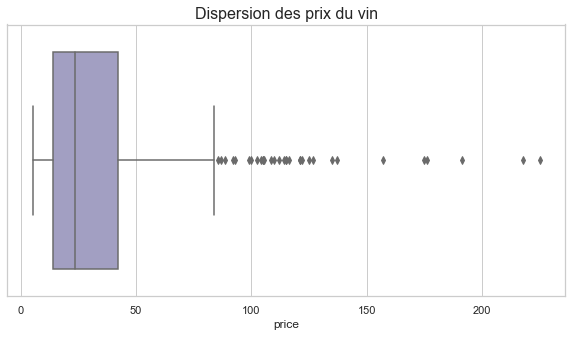

In [326]:
sns.set(style="whitegrid")
f,ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x = 'price', palette="Purples", data = dataf)
ax.set_title("Dispersion des prix du vin", fontsize = 16)

Il y a beaucoup d'outliers, mais des bouteilles à plus de 200 euros ne sont pas rare dans la vraie vie pour des cuvées de prestige (Dom Pérignon, château d'Yquem, etc... ) et on ignore la capacité des bouteilles (magnum, jéroboam etc...). On va regarder ces outliers en détail. Pour se faire, on sait que sur une boite à moustache les outliers supérieur se trouve à Q3 + 1.5 IQ ou IQ = Q3 - Q1

In [327]:
#on calcul le seuil à partir duquel on est en outliers d'après le boxplot
q1 = np.percentile(dataf['price'], 25)
q3 = np.percentile(dataf['price'], 75)
iq = q3 - q1
outlier = q3 + 1.5 * iq
print(outlier)

#on trie le dataframe par prix croissant
dataf = dataf.sort_values(by="price")
#on créer un dataframe dans lequel on met les outliers pour l'affichage
requete = dataf[dataf['price'] > outlier]
requete

84.28750000000001


,product_id,sku,price,total_sales,onsale_web,post_name
206,4359.0,13853,85.6,1.0,1.0,champagne-larmandier-bernier-grand-cru-vieilles-chemins-avize-2011
448,5026.0,13913,86.8,0.0,1.0,champagne-agrapart-fils-mineral-extra-brut-blanc-de-blancs-grand-cru-2012
65,4132.0,11668,88.4,0.0,1.0,zind-humbrecht-pinot-gris-grand-cru-rangen-de-thann-clos-saint-urbain-2012
514,5565.0,19822,92.0,0.0,1.0,tempier-bandol-cabassaou-2017
616,5916.0,14774,93.0,0.0,1.0,wemyss-malts-single-cask-chocolate-moka-cake
674,6214.0,11601,99.0,0.0,1.0,domaine-des-comtes-lafon-volnay-1er-cru-champans-2013
63,4115.0,15382,100.0,0.0,1.0,zind-humbrecht-riesling-gc-rangen-thann-clos-st-urbain-2017
386,4903.0,14805,102.3,0.0,1.0,domaine-des-croix-corton-grand-cru-les-greves-2017
223,4407.0,3509,104.0,1.0,1.0,cognac-frapin-cigar-blend
440,5008.0,11602,105.0,0.0,1.0,domaine-des-comtes-lafon-volnay-1er-cru-santenots-du-milieu-2013


En regardant en détail les outliers et notamment la colonne post_name, je n'ai pas l'impression qu'il y est de problème avec les prix, on a bien des noms de vin, champagne ou spiritueux

In [328]:
ecarttype = dataf['price'].std(ddof=0)
mediane = dataf['price'].mean()
print("la valeur médiane est : ", mediane)
print("l'écart type est de : ", ecarttype)

la valeur médiane est :  32.493137254901946
l'écart type est de :  27.79104294100292


Donc même si une valeur de 225 euros est à 7 fois l'écart-type, dans la réalité, ce n'est pas si rare et on peut conclure qu'il n'y a rien d'anormal avec les prix. On va maintenant passer au calcul du chiffre d'affaires.
### Chiffre d'affaires par produits

In [329]:
dataf['Chiffre d\'affaires'] = dataf['price'] * dataf['total_sales']
dataf

,product_id,sku,price,total_sales,onsale_web,post_name,Chiffre d'affaires
664,6129.0,14570,5.2,0.0,1.0,moulin-de-gassac-igp-pays-dherault-guilhem-blanc-2017,0.0
98,4173.0,16211,5.7,13.0,1.0,maurel-pays-doc-chenin-colombard-2019,74.1
573,5777.0,14338,5.7,0.0,1.0,maurel-pays-d-oc-cabernet-sauvignon-2017,0.0
97,4172.0,16210,5.7,43.0,1.0,maurel-pays-oc-chardonnay-2019,245.1
99,4174.0,16209,5.7,6.0,1.0,maurel-cabardes-tradition-2017,34.2
...,...,...,...,...,...,...,...
566,5767.0,15185,175.0,0.0,1.0,camille-giroud-clos-de-vougeot-2016,0.0
219,4402.0,3510,176.0,13.0,1.0,cognac-frapin-vip-xo,2288.0
601,5892.0,14983,191.3,3.0,1.0,coteaux-champenois-egly-ouriet-ambonnay-rouge-2016,573.9
434,5001.0,14581,217.5,0.0,1.0,david-duband-charmes-chambertin-grand-cru-2014,0.0


### Chiffre d'affaires réalisé en ligne

In [331]:
ca = float(dataf.loc[dataf['onsale_web'] == 1 , 'Chiffre d\'affaires'].sum())
print("Le chiffre d'affaires en ligne est de","{:,.2f}€".format(ca))

Le chiffre d'affaires en ligne est de 70,568.60€
